**Time series forecasting solution**

**Problem Statement** : Predict the temperature column ‘ _tempm’ for Delhi, using Time Series Forecasting

**Accuracy Measure**: Root Mean Squared Error (RMSE)

In [32]:
import pandas as pd
from pandas import datetime
import numpy as np
import pickle
#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
#setting figure size
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
import xgboost as xgb
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
rcParams['figure.figsize'] = 10,10
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Weather_data.csv to Weather_data.csv


## Data cleaning and handling missing values

In [ ]:
data = pd.read_csv('Weather_data.csv')

In [ ]:
#column name are not written properly
# st = ' _conds'
# st=st.replace(' _','')
# print(st)
# data = data.rename(columns={' _conds':'conds',' _conds':'conds',' _conds':'conds',' _conds':'conds',' _conds':'conds',' _conds':'conds'})
for col in data.columns:
  data.rename(columns={col:col.replace(' _','')},inplace=True)

In [ ]:
weather_data=data.dropna(thresh=50000,axis=1)#dropping feature having more than 50000 missing value

In [ ]:
weather_data=weather_data.fillna(weather_data.mean())

In [ ]:
weather_data = weather_data.fillna(method='ffill')#fill catagorical data used forward fill method

In [ ]:
weather_data.isna().sum()

datetime_utc    0
conds           0
dewptm          0
fog             0
hail            0
hum             0
pressurem       0
rain            0
snow            0
tempm           0
thunder         0
tornado         0
vism            0
wdird           0
wdire           0
wspdm           0
dtype: int64

In [ ]:
weather_data['datetime_utc'] = pd.to_datetime(weather_data['datetime_utc']) 

In [ ]:
weather_data.set_index('datetime_utc',inplace=True)

In [ ]:
weather_data.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
datetime_utc,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.000000,280.0,West,7.400000
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,0,2.419885,0.0,North,7.685854
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,0,2.419885,0.0,North,7.685854
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,0,2.000000,0.0,North,7.685854
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.200000,0.0,North,0.000000


## Univarient Analysis

Here we perform univarient analysis on each feature to get understanding about the feature we analyse only numerical and catagorica feature.
There are some binary feature we don't need to analyse.

Univarient Analysis on catagorical feature

Univarient Analysis on conds feature

In [ ]:
weather_data['conds'].value_counts()

Haze                             46924
Smoke                            20338
Mist                              9012
Clear                             3129
Widespread Dust                   2836
Fog                               2541
Scattered Clouds                  2197
Partly Cloudy                     2064
Shallow Fog                       1859
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                        966
Patches of Fog                     820
Thunderstorms and Rain             471
Light Drizzle                      410
Heavy Fog                          407
Rain                               394
Unknown                            378
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           52
Heavy Rain               

Univarient Analysis on wdire feature

In [ ]:
data['wdire'].value_counts()


North       18854
West        11414
WNW          7211
East         7092
NW           6908
WSW          5378
ESE          5249
ENE          3685
SE           3462
SW           3153
NNW          2647
NE           2470
SSE          2034
NNE          1731
SSW          1706
South        1534
Variable        5
Name: wdire, dtype: int64

Univarient Analysis on numerical features

This function will give 90-100% values of feature under consideration and plot a box plot to see feature distribution
percentile and box plot help us to determine is there any noisy data available in dataset

In [ ]:
def describe_column(col):
  for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(col,90+i))

  print('##################################################################')

  sns.boxplot(y=col, data =data)
  plt.show()  

  print('##################################################################')




Univarient Analysis on dewptm feature

90 percentile value is 26.0
91 percentile value is 26.0
92 percentile value is 26.0
93 percentile value is 26.0
94 percentile value is 26.0
95 percentile value is 26.0
96 percentile value is 27.0
97 percentile value is 27.0
98 percentile value is 27.0
99 percentile value is 28.0
100 percentile value is 75.0
##################################################################


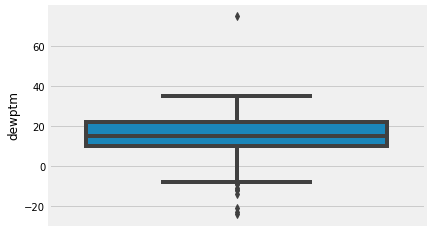

##################################################################


In [ ]:
describe_column(weather_data['dewptm'])

Univarient Analysis on hum feature

90 percentile value is 89.0
91 percentile value is 90.0
92 percentile value is 92.0
93 percentile value is 93.0
94 percentile value is 94.0
95 percentile value is 94.0
96 percentile value is 95.0
97 percentile value is 99.0
98 percentile value is 100.0
99 percentile value is 100.0
100 percentile value is 243.0
##################################################################


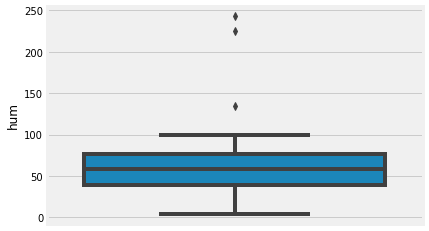

##################################################################


In [ ]:
describe_column(weather_data['hum'])


Univarient Analysis on tempm feature

90 percentile value is 35.0
91 percentile value is 36.0
92 percentile value is 36.0
93 percentile value is 37.0
94 percentile value is 37.0
95 percentile value is 38.0
96 percentile value is 39.0
97 percentile value is 39.0
98 percentile value is 40.0
99 percentile value is 42.0
100 percentile value is 90.0
##################################################################


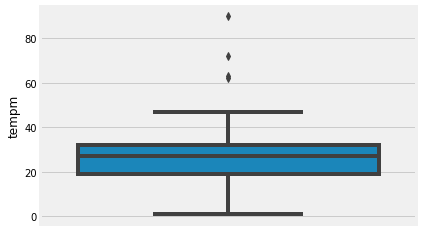

##################################################################


In [ ]:
describe_column(weather_data['tempm'])


Univarient Analysis on vism feature

90 percentile value is 4.0
91 percentile value is 4.0
92 percentile value is 4.0
93 percentile value is 4.0
94 percentile value is 4.5
95 percentile value is 4.5
96 percentile value is 5.0
97 percentile value is 5.0
98 percentile value is 5.0
99 percentile value is 6.0
100 percentile value is 6436.0
##################################################################


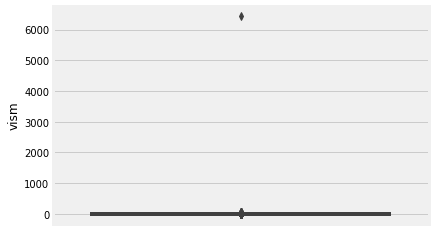

##################################################################


In [ ]:
describe_column(weather_data['vism'])

Univarient Analysis on wdird feature

90 percentile value is 310.0
91 percentile value is 310.0
92 percentile value is 320.0
93 percentile value is 320.0
94 percentile value is 320.0
95 percentile value is 320.0
96 percentile value is 320.0
97 percentile value is 330.0
98 percentile value is 340.0
99 percentile value is 350.0
100 percentile value is 960.0
##################################################################


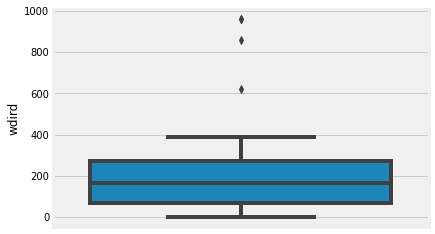

##################################################################


In [ ]:
describe_column(weather_data['wdird'])


Univarient Analysis on pressurem feature

90 percentile value is 1017.0
91 percentile value is 1018.0
92 percentile value is 1018.0
93 percentile value is 1018.0
94 percentile value is 1019.0
95 percentile value is 1019.0
96 percentile value is 1019.0
97 percentile value is 1020.0
98 percentile value is 1021.0
99 percentile value is 1022.0
100 percentile value is 101061443.0
##################################################################


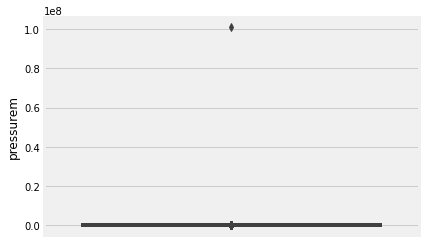

##################################################################


In [ ]:
describe_column(weather_data['pressurem'])

90 percentile value is 18.5
91 percentile value is 18.5
92 percentile value is 18.5
93 percentile value is 18.5
94 percentile value is 18.5
95 percentile value is 20.4
96 percentile value is 22.2
97 percentile value is 22.2
98 percentile value is 25.9
99 percentile value is 27.8
100 percentile value is 1514.9
##################################################################


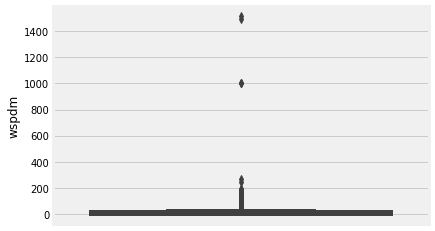

##################################################################


In [ ]:
describe_column(weather_data['wspdm'])


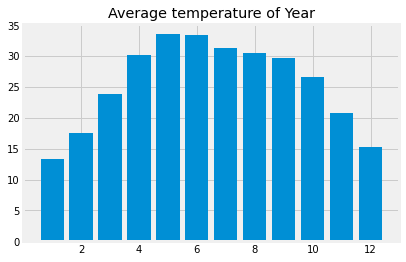

In [ ]:

month_group = weather_data['tempm'].to_frame()
month_group['moy'] = month_group.index.month
month_group = month_group.groupby('moy').tempm.mean().to_frame()
plt.bar(month_group.index,month_group['tempm'])
plt.title('Average temperature of Year')
plt.show()

## Removing outliers

As from above analysis we can see there are some outliers in data. It is important to remove noisy data in order to get best result from model.
So below function will help to remove outliers from data
for instance ex temperature feaure: Max temperature recorded for feature temperature 90 but as per human understanding temperature never excided appx 50
hence we are taking only record whose tempm valus is less or equal to 50

In [ ]:
weather_data.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wdire', 'wspdm'],
      dtype='object')

In [ ]:
def remove_outliers(df):
  a = df.shape[0]
  print('Number point in dataframe ',a)
  temp_frame = df[(df.dewptm <= 40)]
  b = temp_frame.shape[0]
  # print(a,b)
  print('Number of point removed after removing outliers in dewptm ',(a-b))
  
  temp_frame = df[df.hum <= 110]
  c = temp_frame.shape[0]
  # print(c,d)
  print('Number of point removed after removing outlier in hum ',(b-c))

  temp_data =  df[df.tempm <= 50]
  d = temp_frame.shape[0]
  # print(d,e)
  print('Number of point removed after removing outlier in tempm ',(c-d))

  temp_data = df[df.vism <= 6]
  e = temp_frame.shape[0]
  # print(e,f)
  print('Number of point removed after removing outlier in vism ',(d-e))

  temp_frame = df[df.wdird <= 410]
  f = temp_frame.shape[0]
  # print(f,g)
  print('Number of point removed after removing outlier in wdird ',(e-f))

  temp_frame = df[df.wspdm <= 30]  
  g = temp_frame.shape[0]
  # print(h,i)

  print('Number of point removed after removing outlier in wdird ',(f-g))

  temp_frame = df[(df.pressurem <= 1025) & (df.pressurem >0 )]  
  h = temp_frame.shape[0]
  print('h',h)

  print('Number of point removed after removing outlier in wdird ',(g-h))

  df = df[(df.dewptm <= 40)]
  df = df[df.hum <= 110]
  df = df[df.tempm <= 50]
  df = df[df.vism <= 6]
  df = df[df.wdird <= 410]
  df = df[df.wspdm <= 30]
  df = df[(df.pressurem <= 1025) & (df.pressurem >0 )]
  print ("Total outliers removed",a - df.shape[0])
  print ("----------------------------------------------------------------------------")
  return df


In [ ]:
print ("Removing outliers")
print ("----")
clean_weather_data = remove_outliers(weather_data)
print("fraction of data points that remain after removing outliers", float(len(clean_weather_data))/len(weather_data))

Removing outliers
----
Number point in dataframe  98913
Number of point removed after removing outliers in dewptm  1
Number of point removed after removing outlier in hum  2
Number of point removed after removing outlier in tempm  0
Number of point removed after removing outlier in vism  0
Number of point removed after removing outlier in wdird  1
Number of point removed after removing outlier in wdird  509
h 97853
Number of point removed after removing outlier in wdird  547
Total outliers removed 2073
----------------------------------------------------------------------------
fraction of data points that remain after removing outliers 0.979042188589973


After removing outliers also we are preserving 98.9% percentile of data which is very good that means removing outliers does not much of data loss

## EDA on timeseries data

Creating series data set.
Resampling data on hourly and taking mean.

In [ ]:
series = pd.DataFrame()
# series['date'] = data['datetime_utc']

series = clean_weather_data.resample('D').mean()

In [ ]:
series = series.dropna()

In [ ]:
series.head()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
datetime_utc,,,,,,,,,,,,,
1996-11-01,11.625000,0.0,0.0,53.875000,1010.000000,0.0,0.0,22.000000,0.0,0.0,2.334942,35.000000,5.728659
1996-11-02,10.590909,0.0,0.0,50.636364,1009.863636,0.0,0.0,22.227273,0.0,0.0,3.011802,92.272727,6.861707
1996-11-03,12.041667,0.0,0.0,55.958333,1010.500000,0.0,0.0,21.791667,0.0,0.0,2.297490,106.666667,5.044655
1996-11-04,10.222222,0.0,0.0,48.055556,1011.333333,0.0,0.0,22.722222,0.0,0.0,2.342203,55.555556,2.282547
1996-11-05,8.200000,0.0,0.0,29.400000,1011.800000,0.0,0.0,27.800000,0.0,0.0,3.900000,208.000000,10.020000


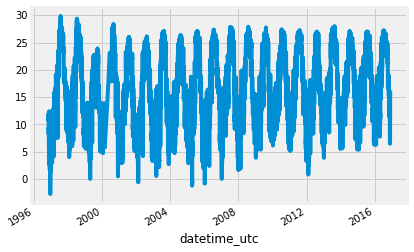

In [ ]:
series['dewptm'].plot()
plt.show()

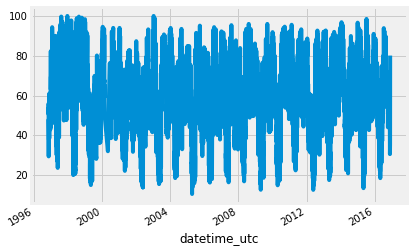

In [ ]:
series['hum'].plot()
plt.show()

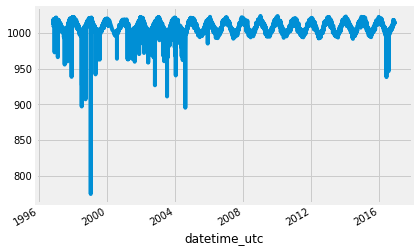

In [ ]:
series['pressurem'].plot()
plt.show()

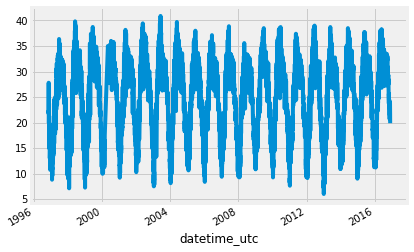

In [ ]:
series['tempm'].plot()
plt.show()

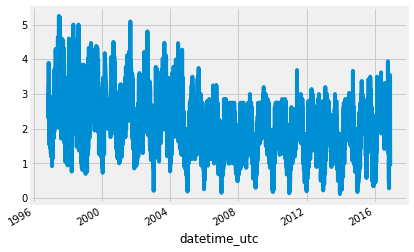

In [ ]:

series['vism'].plot()
plt.show()

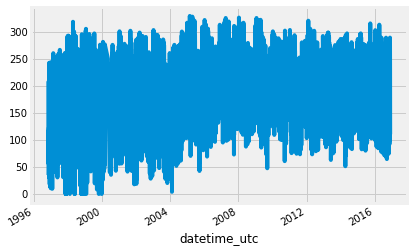

In [ ]:
series['wdird'].plot()
plt.show()

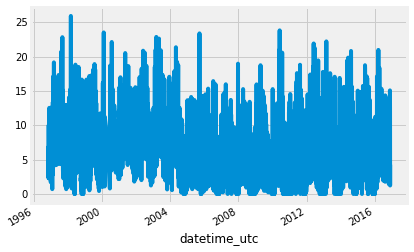

In [ ]:
series['wspdm'].plot()
plt.show()

From above plots we can say that data might be stationary as they have group around same mean and have appx same variance.

But there might be chance of seasonality we will check for seasonality using adafuller test

If value for p<0.05 that means it is stationary 

### Adfuller test for checking stionality

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
for col in series.columns:
  adf_test(series[col])
  print('###########################################')

Augmented Dickey-Fuller Test: 
ADF test statistic        -5.641281
p-value                    0.000001
# lags used               13.000000
# observations          7175.000000
critical value (1%)       -3.431262
critical value (5%)       -2.861943
critical value (10%)      -2.566984
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
###########################################
Augmented Dickey-Fuller Test: 
ADF test statistic     -9.764894e+00
p-value                 7.394566e-17
# lags used             3.100000e+01
# observations          7.157000e+03
critical value (1%)    -3.431264e+00
critical value (5%)    -2.861944e+00
critical value (10%)   -2.566985e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
###########################################
Augmented Dickey-Fuller Test: 
ADF test statistic     -1.783646e+01
p-value                 3.118458e-30
# lags used 

From above execution adfuller test giving all columns are stationary ie we dont need to do any differencing.

We can move foreward

## Models

### VAR MODEL

In [27]:
#creating the train and validation set
train = series[:int(0.8*(len(series)))]
valid = series[int(0.8*(len(series))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [34]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[train.columns])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for col in train.columns:
    print('rmse value for', col, 'is : ', np.sqrt(mean_squared_error(pred[col], valid[col])))

rmse value for dewptm is :  6.2415289506124125
rmse value for fog is :  0.19324296678556455
rmse value for hail is :  0.008766141951606679
rmse value for hum is :  16.90548099707424
rmse value for pressurem is :  7.628566386724313
rmse value for rain is :  0.09316284417922713
rmse value for snow is :  0.0032963291421868116
rmse value for tempm is :  7.088037801917422
rmse value for thunder is :  0.04027471937425574
rmse value for tornado is :  3.206766798844292e-05
rmse value for vism is :  0.7090458166521941
rmse value for wdird is :  59.407829486300024
rmse value for wspdm is :  3.9230164758254142


In [38]:
model = VAR(endog=series)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print((yhat[0][7]))

19.777689260953945


In [39]:
from datetime import date

In [40]:
data = pd.to_datetime('2016-12-30')
x = (data - pd.to_datetime('2016-11-30')).days## Predicting temperature for '2016-12-30'. We have data till 2016-11-30
# print(x)

In [42]:
#make final predictions
#weather forecast for next 30 days
yhat = model_fit.forecast(model_fit.y, steps=x)
# for i in range(x):
#   print((yhat[i][7]))## WIll give forecasted temperature 2016-11-30 to 2016-12-30
print('Temperature for ',data,'is',yhat[29][7])

Temperature for  2016-12-30 00:00:00 is 22.63027067867473


In [46]:
filename = 'tsf_VAR_model'
pickle.dump(model_fit, open(filename, 'wb'))

So In this model we try to forecast temperature using var model which is similar to arima model. 

Var is used for multivarient forecasting.

Basically Var uses all multivarient feature for forecasting if there is correlation between the feature

Fist divided data into train and validate to get how model is performing

Get the RMSE value for each feature which is quite good that means model is doing pretty much good job

### RandomForest

Random forest is machine learning model we use randomforestregression for this task. 

Before that we have to impose this problem as supervised machine learning problem where all the data can be used as feature and temperature will be our output 

we split data on time series 70 for train 
30 for test

In [ ]:

train_len = np.floor(len(series)*0.7)
train = series[:5032]
test = series[5032:]
print(train.shape)
print(test.shape)

(5032, 13)
(2157, 13)


In [ ]:
#Splitting data into train test cv
X_train = train.drop(['tempm'],axis=1)
y_train = train['tempm'].values

In [ ]:
X_test = test.drop(['tempm'],axis=1)
y_test = test['tempm'].values

In [ ]:
X_train.head(2)

,dewptm,fog,hail,hum,pressurem,rain,snow,thunder,tornado,vism,wdird,wspdm
datetime_utc,,,,,,,,,,,,
1996-11-01,11.625000,0.0,0.0,53.875000,1010.000000,0.0,0.0,0.0,0.0,2.334942,35.000000,5.728659
1996-11-02,10.590909,0.0,0.0,50.636364,1009.863636,0.0,0.0,0.0,0.0,3.011802,92.272727,6.861707


We can perform multiple hyperparameter tunning. For simplicity as of now we are just training model on some default value

In [ ]:
regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [ ]:

y_pred = regr1.predict(X_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(X_train)
rndf_train_predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import mean_squared_error
print('train RMSE: ',np.sqrt(mean_squared_error(y_train, rndf_train_predictions)))

print('test RMSE: ',np.sqrt(mean_squared_error(y_test, rndf_test_predictions)))

train RMSE:  1.1935703009588818
test RMSE:  1.538203440223223


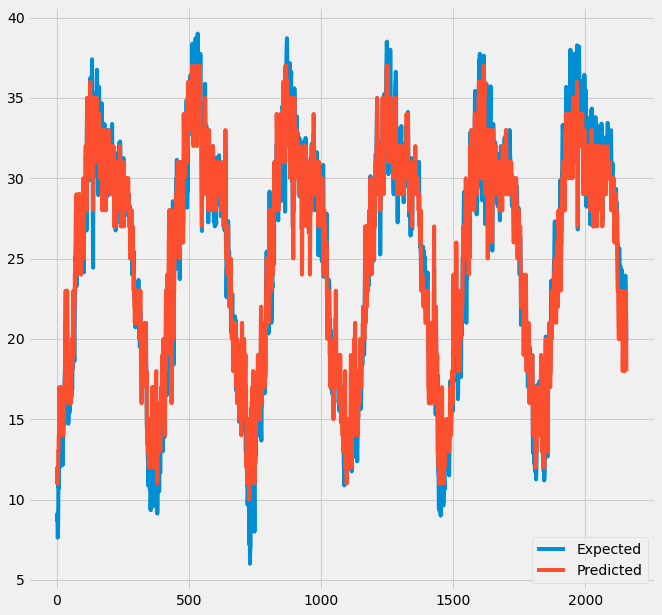

In [ ]:
plt.plot(y_test, label='Expected')
plt.plot(rndf_test_predictions, label='Predicted')
plt.legend()
plt.show()

From above plot we can see ramdom forest regressor is doing great job with

train RMSE:  1.193

test RMSE:  1.538



In [ ]:
import pickle

In [ ]:
filename = 'tsf_RF_model'
pickle.dump(regr1, open(filename, 'wb'))

### XgBoost

In [ ]:
import xgboost as xgb

In [ ]:
x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)

In [ ]:
# X_train = X_train.drop(['datetime_utc','conds','wdire'],axis=1)

In [ ]:
x_model.fit(X_train, y_train)

[07:43:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, min_child_weight=3, n_estimators=1000,
             nthread=4, reg_alpha=200, reg_lambda=200, subsample=0.8)

In [ ]:
y_pred = x_model.predict(X_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(X_train)
xgb_train_predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import mean_squared_error
print('train MSE: ',np.sqrt(mean_squared_error(y_train, xgb_train_predictions)))

print('test MSE: ',np.sqrt(mean_squared_error(y_test, xgb_test_predictions)))

train MSE:  1.2768201617833619
test MSE:  1.414697858333799


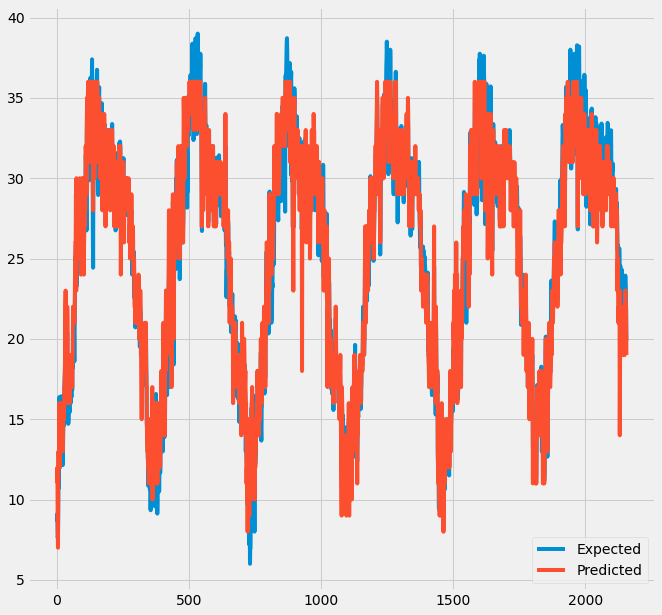

In [ ]:
plt.plot(y_test, label='Expected')
plt.plot(xgb_test_predictions, label='Predicted')
plt.legend()
plt.show()

Random forest and XGboost is gin=ving appx similar RMSE.

XGboost RMSE

train MSE:  1.2768201617833619

test MSE:  1.414697858333799

In [ ]:
filename = 'tsf_XGB_model'
pickle.dump(x_model, open(filename, 'wb'))

### LSTM

Finally we are using LSTM 

LSTM are deep learning model can be used for time series forecasting 

lstm can handle non stationary data also

let's build model

In [ ]:
# we have already dowsampled data and not dividing it into train and test split
# train 75 test 25
train_len = np.floor(len(df)*0.75)
train = df[:5032]
test = df[5032:]



Before creating model it is important scale our data.

In [ ]:
scaler = MinMaxScaler()

In [ ]:

scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

The Keras deep learning library provides the TimeseriesGenerator to automatically transform both univariate and multivariate time series data into samples, ready to train deep learning models

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 7 #on how previous day we want to use for prediction
n_features = 13 # number of feature we have
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)#this will generate two array one contain values from past 7 days and 8 day as output

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.44092966 0.         0.         0.48463687 0.94627782 0.
 0.         0.44078947 0.         0.         0.42905976 0.10646388
 0.22097045 0.40923685 0.         0.         0.44845099 0.94572839
 0.         0.         0.44751794 0.         0.         0.56162891
 0.2806775  0.26467531 0.45369965 0.         0.         0.50791434
 0.9482924  0.         0.         0.43462171 0.         0.
 0.42172447 0.32446134 0.19458648 0.39793734 0.         0.
 0.41961515 0.95165004 0.         0.         0.46217105 0.
 0.         0.43048184 0.16899028 0.08804426 0.3359603  0.
 0.         0.21117318 0.95353031 0.         0.         0.6125
 0.         0.         0.73559037 0.63269962 0.38649952 0.36239419
 0.         0.         0.41759777 0.95358068 0.         0.
 0.43893914 0.         0.         0.56298258 0.28707224 0.25368677
 0.37452569 0.         0.         0.41899441 0.96004413 0.
 0.         0.43338816 0.         0.         0.50480227 0.35868188
 0.13787505]
Predict this y: 
 [[0.34

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#  define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(100,input_shape=(n_input,n_features)))

# Final Prediction (one neuron per feature)
model.add(Dense(n_features))#n_feature=13: we need one neuron per feature 

model.compile(optimizer='adam', loss='mse')

Keras supports the early stopping of training via a callback called EarlyStopping.

This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=n_input, batch_size=1)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               45600     
                                                                 
 dense (Dense)               (None, 13)                1313      
                                                                 
Total params: 46,913
Trainable params: 46,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop])


Epoch 1/10
5025/5025 [==============================] - 36s 7ms/step - loss: 0.0082 - val_loss: 0.0067
Epoch 2/10
5025/5025 [==============================] - 34s 7ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 3/10
5025/5025 [==============================] - 32s 6ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 4/10
5025/5025 [==============================] - 34s 7ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 5/10
5025/5025 [==============================] - 33s 7ms/step - loss: 0.0063 - val_loss: 0.0065


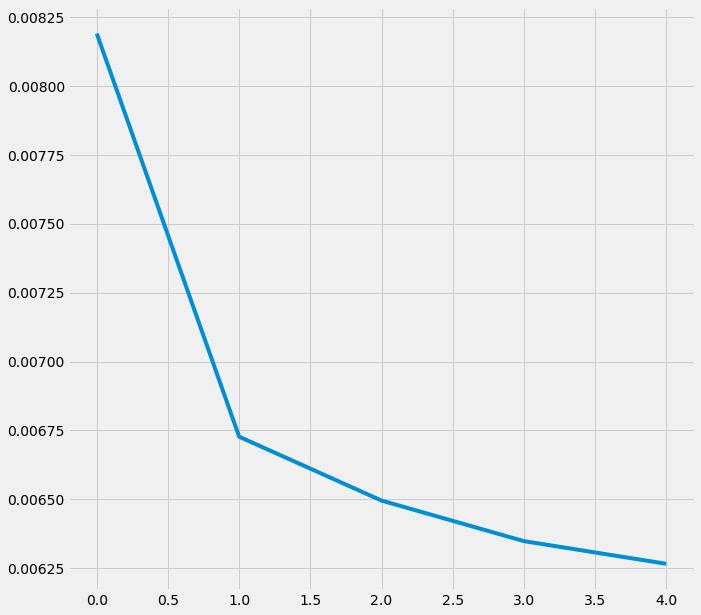

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-7:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
last_train_batch.shape

(1, 7, 13)

In [ ]:
x = model.predict(last_train_batch,verbose=0)

In [ ]:
print(x)

[[ 2.4236786e-01  2.0066294e-01  1.3798103e-04  6.8931651e-01
   9.8836136e-01 -2.6815614e-02 -3.1674094e-04  9.2527784e-02
  -2.4015844e-02 -8.0911862e-04  2.1667692e-01  8.1227505e-01
   3.2033652e-01]]


In [ ]:
scaled_test[0]

array([0.26087274, 0.375     , 0.        , 0.7472067 , 0.97700019,
       0.        , 0.        , 0.04481908, 0.        , 0.        ,
       0.12353106, 0.77380303, 0.29459981])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[ 5.14621239e+00,  2.00662941e-01,  1.72476284e-05, ...,
         1.25057616e+00,  2.67035423e+02,  8.30472430e+00],
       [ 7.24017267e+00,  2.10161194e-01, -2.21656170e-04, ...,
         1.29739432e+00,  2.32827856e+02,  7.43596597e+00],
       [ 9.05048955e+00,  2.14639112e-01, -1.40020624e-04, ...,
         1.31364996e+00,  2.20771388e+02,  7.22642152e+00],
       ...,
       [ 2.57995269e+01,  2.28782557e-02, -7.75041990e-05, ...,
         3.16221610e+00,  1.22862485e+02,  9.29759096e+00],
       [ 2.57995249e+01,  2.28782482e-02, -7.75037333e-05, ...,
         3.16221610e+00,  1.22862485e+02,  9.29759096e+00],
       [ 2.57995249e+01,  2.28782408e-02, -7.75046647e-05, ...,
         3.16221610e+00,  1.22862485e+02,  9.29759096e+00]])

In [ ]:
true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)

In [ ]:
true_predictions.head(2)

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
0,5.146212,0.200663,0.000017,72.193828,1020.444733,-0.026816,-0.000317,10.236494,-0.016011,-0.000101,1.250576,267.035423,8.304724
1,7.240173,0.210161,-0.000222,70.679090,1015.656496,-0.033130,-0.002448,12.245959,-0.008021,-0.000024,1.297394,232.827856,7.435966


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(test['tempm'],true_predictions['tempm']))
print("RMSE Score for tempm feature",rmse)

RMSE Score for tempm feature 11.20575156743237


In [ ]:
filename = 'tsf_LSTM_model'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://e4100242-4dfa-4072-b724-f0727c14a25e/assets


INFO:tensorflow:Assets written to: ram://e4100242-4dfa-4072-b724-f0727c14a25e/assets


In [ ]:
# from datetime import date

In [ ]:
# data = pd.to_datetime('2016-12-30')
# x = (data - pd.to_datetime('2016-11-30')).days## Predicting temperature for '2016-12-30'. We have data till 2016-11-30
# # print(x)

In [ ]:
# #make final predictions
# #weather forecast for next 30 days
# model = VAR(endog=df)
# model_fit = model.fit()
# yhat = model_fit.forecast(model_fit.y, steps=x)
# for i in range(x):
#   print(np.floor(yhat[i][7]))## WIll give forecasted temperature 2016-11-30 to 2016-12-30

LSTM give RMSE of 11.20 we used very  simple and basic network we could add more layer in our network to improve score

Because of time and resourse I did't complecate the model but still we got some good result that we can consider and on that if we want can build more powerfull model to get better results

As we have done in Var model we can also take user input data and predict value

For doing so we need to train model on whole data and predict

Also important note here we upscale our data from hout/minute to day

we can use hour/minute if we need to predict hourly weather prediction


## Model Comparison

In [43]:
from tabulate import tabulate
 
# assign data
mydata = [
    ["VAR", "7.088"],
    ["Random Forest", "1.41"],
    ["XgBoost", "1.4147"],
      ["LSTM", "11.20"]
]
 
# create header
head = ["Model", "RMSE"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------+---------+
| Model         |    RMSE |
+===============+=========+
| VAR           |  7.088  |
+---------------+---------+
| Random Forest |  1.41   |
+---------------+---------+
| XgBoost       |  1.4147 |
+---------------+---------+
| LSTM          | 11.2    |
+---------------+---------+


### Small Description

So basically I never worked with multivarient time series forecasting. I know about univarient analysis but theorotical only. I made this model based on 3-4 days learning and reading lots of blogs.

But After completing this assigment I have good understanding of time series forecasting of both univarient and multivarient 😀

## Conclusion



*   In this assigment we are dealing with time series forecasting on delhi data.

*   I done some data cleaning handlinh missing values removing noisy data.


*   I done some EDA on time series data I upsampled data on day basis(data given on hourly basis) I check all the feature. Checked weather data is stionary or not and found all feature are stionary

*   On visual basis I found there is constant mean and varience but looks like there might be some seasonality so I run adfuller test to get clear understanding of weather data is stationary or not. And found each feature is stationary


*   After that I build. I tried with ARIMA model try to fit arima on top of tempm feature but arima is not giving expected result as it giving me same temperature after some period of time so I discard that model

*   Then I tried with VAR model which give me nice result and RMSE of 7.088 appx on tempm feature


*   Then I tried Two regression model XGboost and Random forest(just for try)
which give good result and got RMSE of 1.41 and 1.41 respectively.
Features: all numerical feature in dataset
Result: tempm

*  At Last I tried deep learning model LSTM. I build LSTM network and train it on training data. got rmse of 11.20 


Done.....!




